# Imports

In [1]:
from fastai.vision.widgets import *
import fastbook
from fastbook import *

In [2]:
path=Path('chest_xray/')

In [12]:
path.ls()

(#5) [Path('chest_xray/__MACOSX'),Path('chest_xray/chest_xray'),Path('chest_xray/test'),Path('chest_xray/train'),Path('chest_xray/val')]

In [47]:
(path/'val'/'PNEUMONIA').ls()

(#8) [Path('chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'),Path('chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg'),Path('chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg'),Path('chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg'),Path('chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg'),Path('chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg'),Path('chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg'),Path('chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg')]

### ONLY 8 items for the validation set ........

In [50]:
(path/'test'/'PNEUMONIA').ls()

(#390) [Path('chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'),Path('chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg'),Path('chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg'),Path('chest_xray/test/PNEUMONIA/person100_bacteria_479.jpeg'),Path('chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg'),Path('chest_xray/test/PNEUMONIA/person100_bacteria_481.jpeg'),Path('chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg'),Path('chest_xray/test/PNEUMONIA/person101_bacteria_483.jpeg'),Path('chest_xray/test/PNEUMONIA/person101_bacteria_484.jpeg'),Path('chest_xray/test/PNEUMONIA/person101_bacteria_485.jpeg')...]

# Prepare the Data for an Exploratory Data Analysis

In [84]:
pneumonia=DataBlock(
    #
    blocks=(ImageBlock, CategoryBlock),
    #
    get_items=get_image_files,
    #
    splitter=GrandparentSplitter(train_name='train', valid_name=('val','test')),
    #
    get_y=parent_label,
    #
    item_tfms=Resize(224),
    #
    batch_tfms=aug_transforms(flip_vert=False))

In [85]:
dls = pneumonia.dataloaders(path)

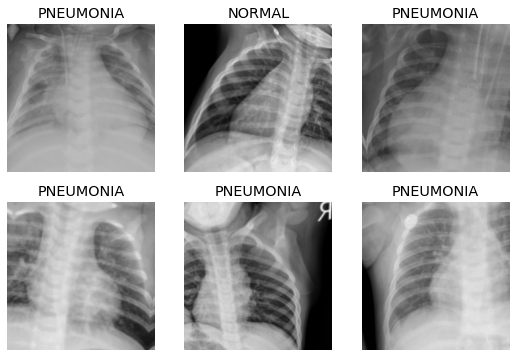

In [86]:
dls.train.show_batch(max_n=6,nrows=2)

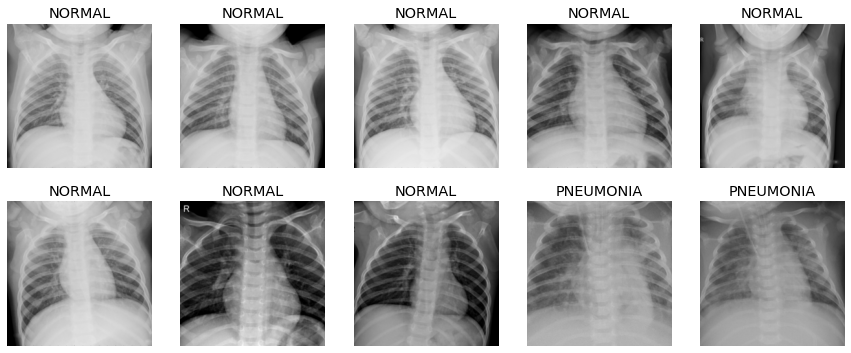

In [87]:
dls.valid.show_batch(max_n=10,nrows=2)

# Checking Data Augmentation

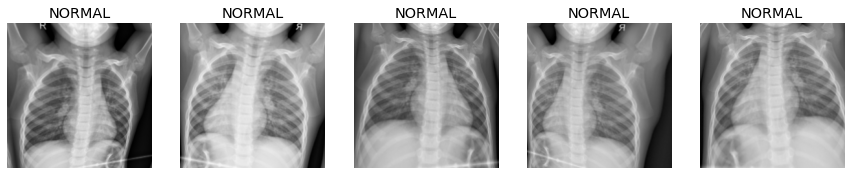

In [88]:
dls.train.show_batch(max_n=5,nrows=1,unique=True)

# Model Building

In [92]:
#Creating the model
learn=cnn_learner(dls,resnet34,pretrained=True,metrics=error_rate)

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.00010964782268274575)

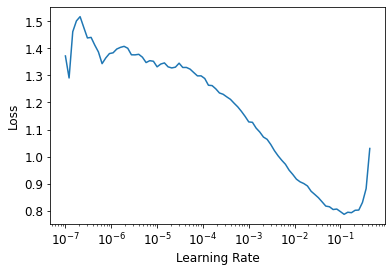

In [93]:
learn.lr_find()

In [94]:
lr=5e-3
learn.fit_one_cycle(3,max_lr=lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.306234,0.468405,0.114063,02:06
1,0.165370,0.405632,0.126563,02:05
2,0.119650,0.418976,0.120312,02:05


SuggestedLRs(lr_min=4.78630090583465e-07, lr_steep=7.585775847473997e-07)

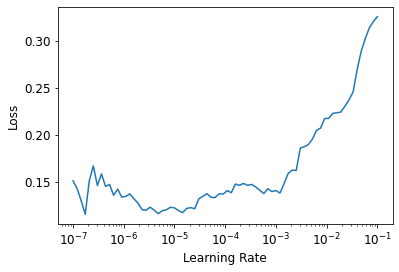

In [95]:
learn.unfreeze()
learn.lr_find()

In [96]:
learn.fit_one_cycle(3,max_lr=7e-7)

epoch,train_loss,valid_loss,error_rate,time
0,0.160997,0.271872,0.103125,02:53
1,0.093149,0.440156,0.134375,02:54
2,0.057770,0.380815,0.110937,02:54


# Model Interpretation

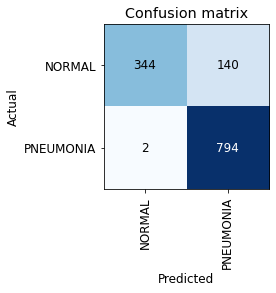

In [97]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()